In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline 

## SUV Predictive model ( Logistic regression)


In this project, we analysed SUV dataset to predict whether a customer will purchase SUV Car or not.


In [4]:
# Firstly, we import the data.

df = pd.read_csv(r'C:\Users\PC\Downloads\suv_data.csv')

In [5]:
# To view the data structure.

df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [7]:
# To determine the attributes and features of the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


## Data Wrangling

In [8]:
# To determine whther there is missing values

df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

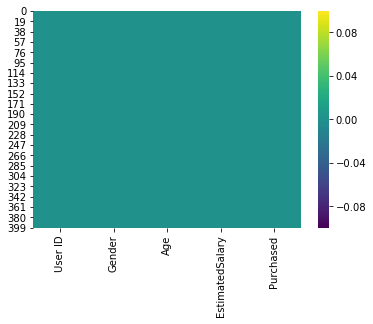

In [9]:
# To visualize absence of missing values.

sns.heatmap(df.isnull(), cmap = 'viridis')

#The output chart shows that the data is free of missing values

In [10]:
# To compute the summary statistics of quantitative data in the dataset.

df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003A3D2B9F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000003A3D3E4C18>]], dtype=object)

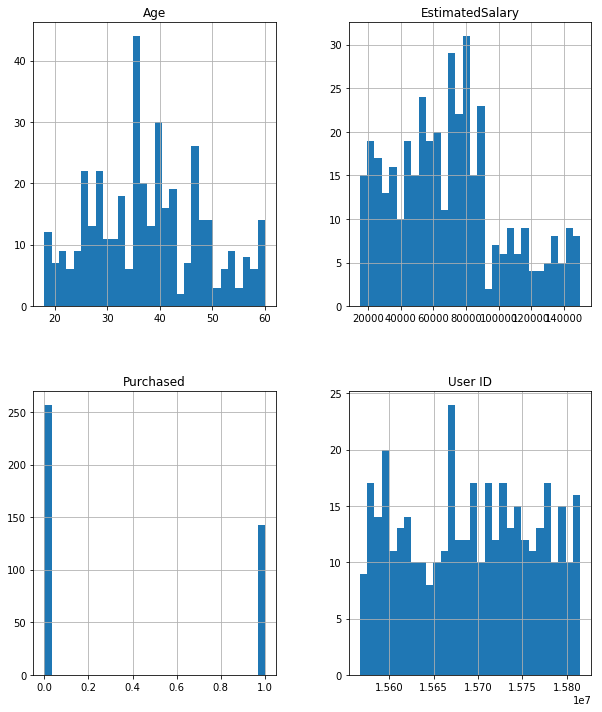

In [11]:
# The distribution of  numerical attribute. 

df.hist(bins =30, figsize =(10,12))

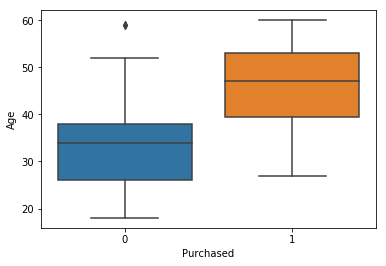

In [12]:
sns.boxplot(x = 'Purchased', y = 'Age', data = df)

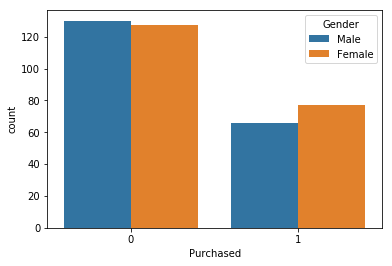

In [23]:
sns.countplot( 'Purchased', hue= 'Gender', data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003A3FB9CC88>]], dtype=object)

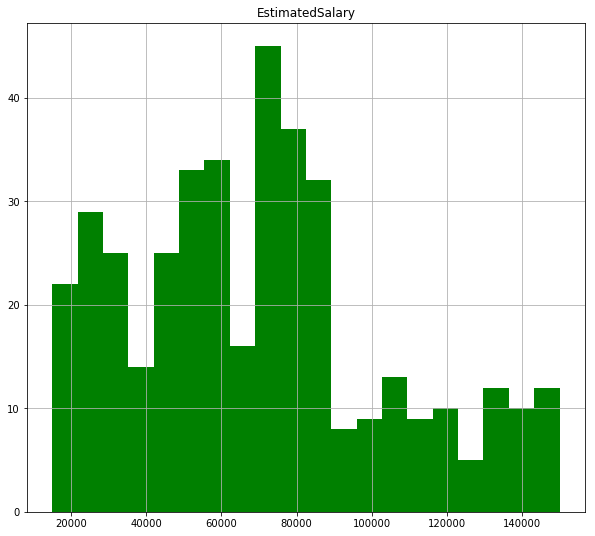

In [29]:
df.hist('EstimatedSalary', bins = 20,color = 'green', figsize = (10,9))

In [42]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [46]:
# To  remove unwanted columns

df.drop("User ID", axis = 1, inplace =True)

In [47]:
df.head(5)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [48]:
df.drop("Gender", axis = 1, inplace = True)

In [49]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


## Logistic Regression

In [50]:
# train_test splitting.  

X = df.drop("Purchased", axis =1)
y = df["Purchased"]

In [51]:
from sklearn.cross_validation import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel=LogisticRegression()

In [55]:
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
predictions = logmodel.predict(X_test)

In [60]:
from sklearn.metrics import classification_report

In [61]:
classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.58      0.98      0.73        58\n          1       0.00      0.00      0.00        42\n\navg / total       0.33      0.57      0.42       100\n'

In [62]:
from sklearn.metrics import confusion_matrix

In [64]:
confusion_matrix(y_test,predictions)

array([[57,  1],
       [42,  0]], dtype=int64)

In [65]:
accuracy_score(y_test,predictions)

0.56999999999999995

## Summary

We have been able to explore the SUV dataset and we created a logistic model to predict whether customer will purchase SUV car or not. The model is 57% accurate with 58%  precision. 